# Introduction

My chosen topic for this project is about kickstarter campaigns and how effective certain categories of crowdfunding are. By definition crowdfunding is the act of funding a project or venture by raising money from a large number of people, normally done through the internet. Kickstarter is a website which is self-reported as the world’s largest crowdfunding platform.  Since launching in 2009, more than 10,000 hardware projects have been successfully crowdfunded. Starting from Feburary 2023, Kickstarter has received more than $7 billion USD in pledges to over 230,000 projects from over 21 million backers (Kickstarter.com 2023). Many films, songs, stage shows, comics, journalism, video games, board games, technology, publishing, and food-related projects have been successfully funded on the platform. Relevant works include a study from Cambridge identifying the challenges in product development in Kickstarter (Jensen 2018). In this study, it was found that no more than 32% of the campaigns managed to deliver the crowdfunded products on time and even when there is a successful crowdfunded product, there is high chance that the final product will lack features that were previous promised or expected of the campaign.

# Specific Aims

My specific aims in this study are to compare and analyze the specific factors that determine whether or not a kickstarter campaign is viewed as successful. We use graphs to visualize the data in order to compare and contrast the different categories of campaigns to see and discuss what categories thrive and which categories wallow on the platform to determine if a given project is best fit for the Kickstarter platform. Additionally, we use graphs to compare and contrast what years the Kickstarter website was most prominent/successful to decide whether or not the platform is still worth using today. In addition to this, we want to create a model that can predict data for future campaigns, to determine if the platform is still a viable option today. This analysis of kickstarter campaigns such as these can be used to inform investment decisions and guide future crowdfunding campaigns, and determine whether or not Kickstarter as a service for getting projects funded is worth using. As for what I expect to see, I expect to see technology trend high in successes as technology is a hot topic in the modern era.

# Data Description

This dataset contains 372061 unique entries and 10 different variables. This dataset shows whether the kickstarter ultimately succeeded or failed to meet their funding goals. The variables columns are listed as follows:

* ID: A unique identifier for each project
* Name: The name of the project
* Category: The main category of the project (e.g., technology, art, film & video, etc.)
* Subcategory: The subcategory of the project (e.g., mobile apps, painting, rock music, etc.)
* Country: The country where the project is being developed
* Launched: The date the project was launched, the dataset only goes up to entries that end in December 2018
* Deadline: The last date the project can be crowdfunded
* Goal: The amount of money the creator needs to complete the project depicted in USD
* Pledged: The amount of money pledged to by the backers depicted in USD
* Backers: The number of indivduals who chose to back the project
* State: Current condition the project is in. States include: Cancelled, Failed, Live, Successful, Suspended


For these variables, the columns of ID and Name we're too unique for the purposes of this analysis and therefore dropped from the dataset. The Subcategory column ended up to be to specific and thus went unused. 

# Research Methods

### Loading the Dataset

First we load our dataset from the csv file


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


startData = pd.read_csv("data/kickstarter_projects.csv")

### Data Cleaning

Generally since the ID column has a unique value for each entry, it is not useful so we can drop it from our dataset


In [126]:
startData = startData.drop('ID', axis=1)

We also check for null values and thanks to the code below, we found that their are no empty values


In [127]:
startData.isnull().sum()

Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

We can then create a new column containing the Elapsed Time it takes for a kickstarter as this will be useful in our analysis later.


In [128]:
startData['Launched'] = pd.to_datetime(startData['Launched'], format='%Y-%m-%d %H:%M:%S')
startData['Deadline'] = pd.to_datetime(startData['Deadline'], format='%Y-%m-%d')

startData['Elapsed_Time'] = (startData['Deadline'] - startData['Launched']).dt.days
startData.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Elapsed_Time
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28


We see that by looking at the last few entries in our dataset, we come to find that the dates of the dataset end on January 2018 instead of the expected December 2018. With this in mind we remove any of the entries found that had a deadline beyond December 31st, 2017 as it would skew our graphs that analyze kickstarter campaigns by year. We chose to cutoff using the deadline column since any kickstarter campaign with a deadline after January 1st, 2018 must have launched prior to that date.


### Graphs

Next we can show the various graphs that give us some basic statistics pn how trends for kickstarter campaigns changed between each year. For the last graph, the success rate is the percentage of campaigns that met or exceeded the funding goal.


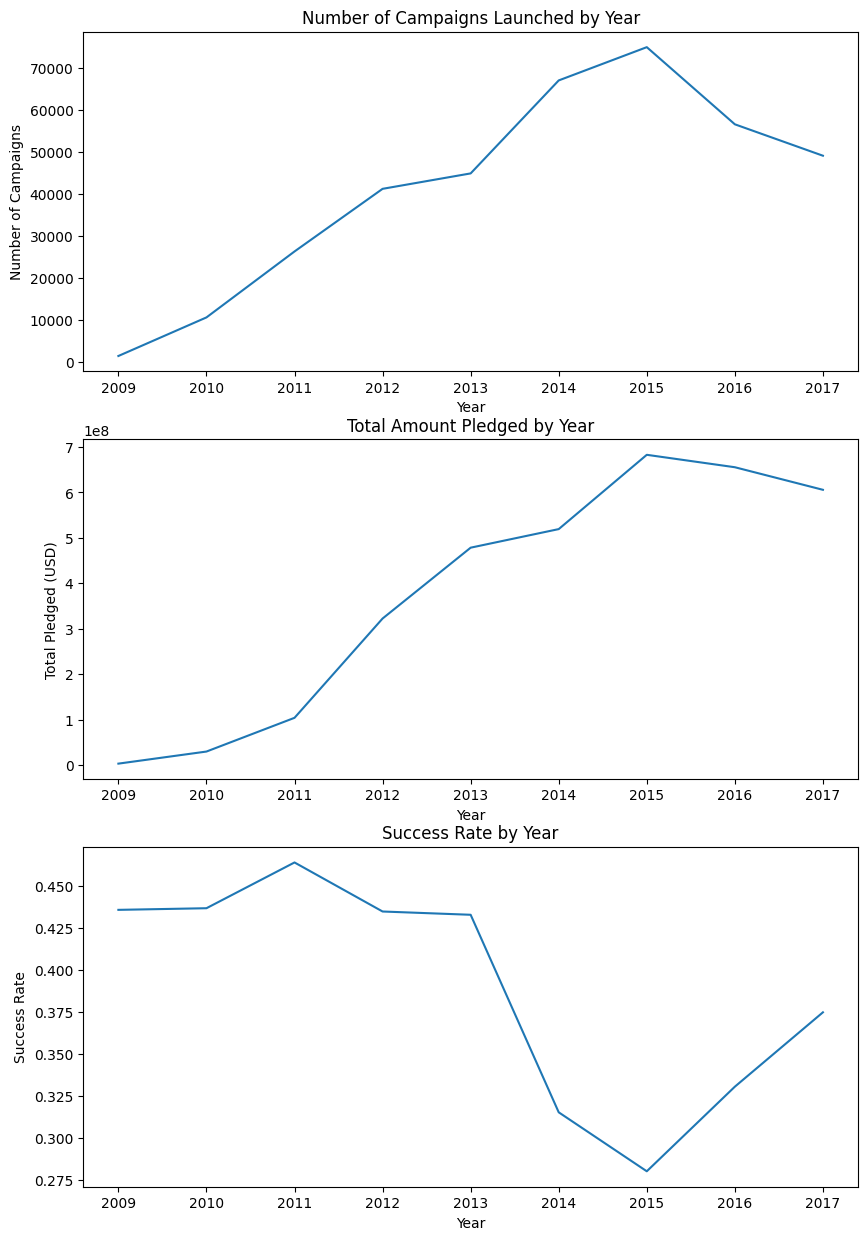

In [129]:
# Group the campaigns by year
grouped = df.groupby(df['Launched'].dt.year)

# Calculate the total number of campaigns launched each year
campaign_counts = grouped.size()

# Calculate the total amount pledged each year
total_pledged = grouped['Pledged'].sum()

# Calculate the success rate (percentage of campaigns that met or exceeded their funding goal) each year
success_rates = grouped['State'].apply(lambda x: sum(x == 'Successful') / len(x))

# Create a line plot of the number of campaigns launched, total amount pledged, and success rate by year
fig, ax = plt.subplots(nrows=3, figsize=(10,15))
ax[0].plot(campaign_counts.index, campaign_counts.values)
ax[0].set_title('Number of Campaigns Launched by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Campaigns')
ax[1].plot(total_pledged.index, total_pledged.values)
ax[1].set_title('Total Amount Pledged by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Pledged (USD)')
ax[2].plot(success_rates.index, success_rates.values)
ax[2].set_title('Success Rate by Year')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Success Rate')
plt.show()



Next we can divide our data by category and see how each individual category of kickstarter campaign changed between each year using the same criteria as the previous graphs.


C:\Users\abxyl\AppData\Local\Temp\ipykernel_4732\2771035216.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20')


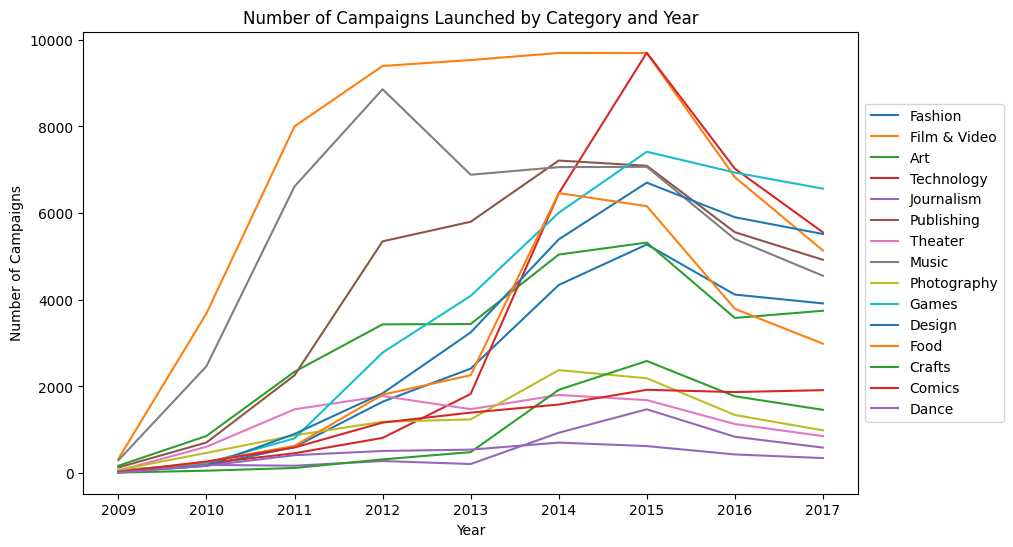

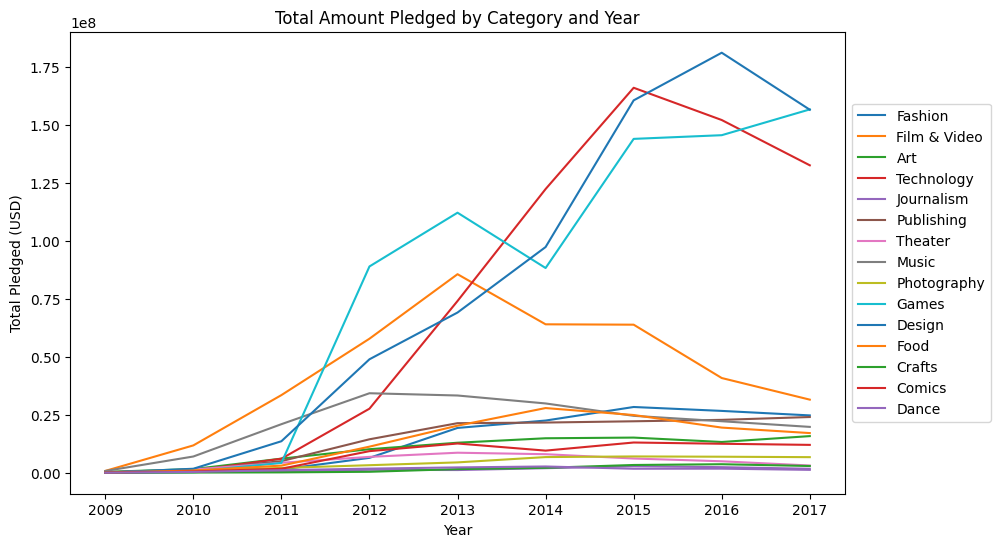

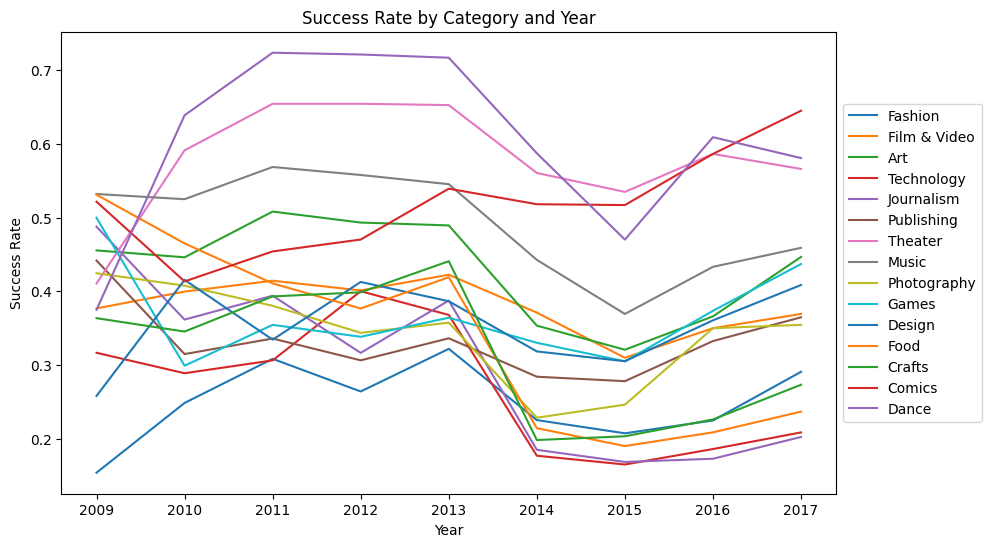

In [130]:
import matplotlib.cm as cm

grouped = df.groupby(['Category', df['Launched'].dt.year])

# Calculate the total number of campaigns launched for each category and year
campaign_counts = grouped.size()

# Calculate the total amount pledged for each category and year
total_pledged = grouped['Pledged'].sum()

# Calculate the success rate (percentage of campaigns that met or exceeded their funding goal) for each category and year
success_rates = grouped['State'].apply(lambda x: sum(x == 'Successful') / len(x))

#Create Color Map
color_map = cm.get_cmap('tab20')


# Create a line plot of the number of campaigns launched over time for each Category
fig, ax = plt.subplots(nrows=1, figsize=(10,6))
for category in df['Category'].unique():
    data = campaign_counts.loc[category]
    ax.plot(data.index, data.values, label=category)
ax.set_title('Number of Campaigns Launched by Category and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Campaigns')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Create a line plot of the total amount pledged over time for each Category
fig, ax = plt.subplots(nrows=1, figsize=(10,6))
for category in df['Category'].unique():
    data = total_pledged.loc[category]
    
    ax.plot(data.index, data.values, label=category)
ax.set_title('Total Amount Pledged by Category and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Pledged (USD)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Create a line plot of the success rate over time for each Category
fig, ax = plt.subplots(nrows=1, figsize=(10,6))
for category in df['Category'].unique():
    data = success_rates.loc[category]
    ax.plot(data.index, data.values, label=category)
ax.set_title('Success Rate by Category and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Success Rate')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Next we can look at the results by category


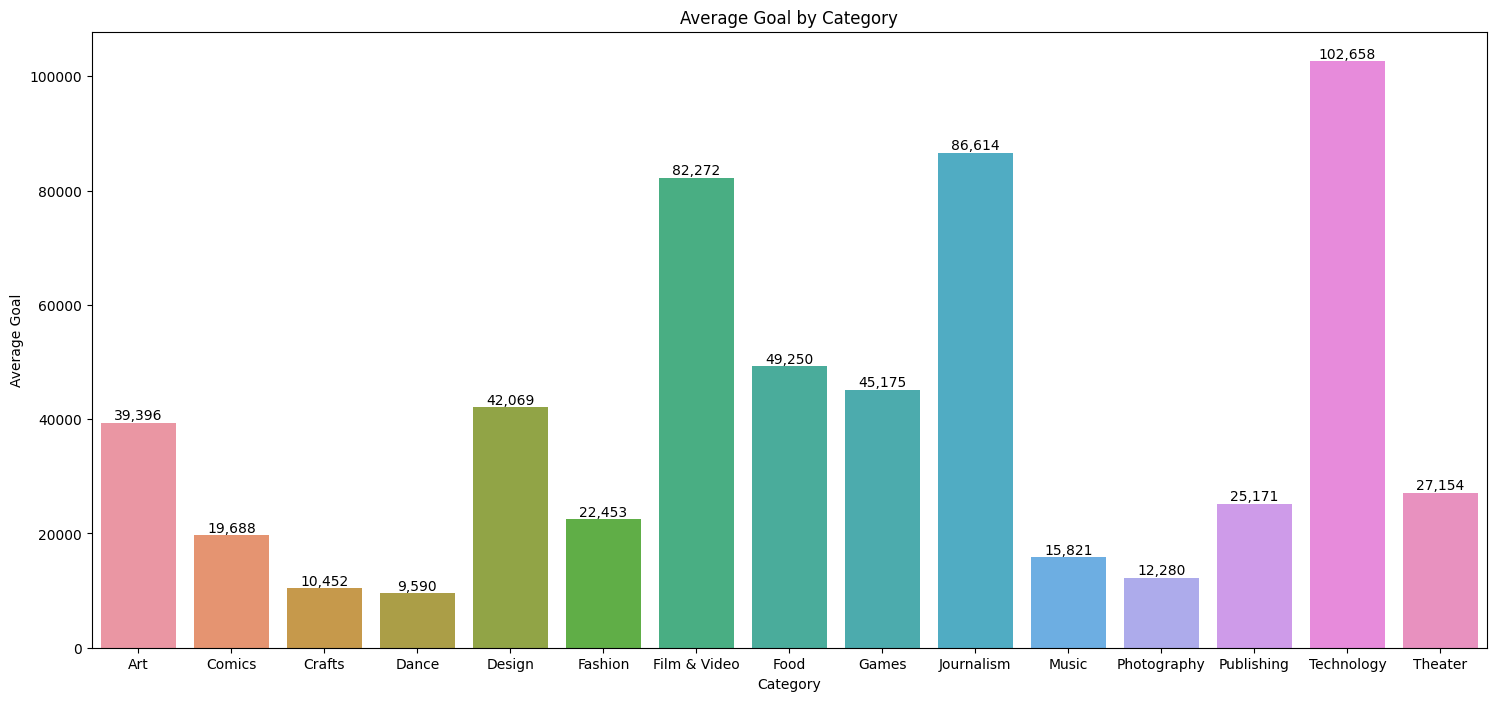

In [131]:
avg_goal_by_category = df.groupby('Category')['Goal'].mean().reset_index()
fig = plt.figure(figsize=(18, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Goal', data=avg_goal_by_category)

# Set the title and axis labels
plt.title('Average Goal by Category')
plt.xlabel('Category')
plt.ylabel('Average Goal')


# Add total number of backers on top of each bar
for index, row in avg_goal_by_category.iterrows():
    plt.annotate(f'{int(row["Goal"]):,}', xy=(index, row['Goal']), ha='center', va='bottom')

# Show the plot
plt.show()

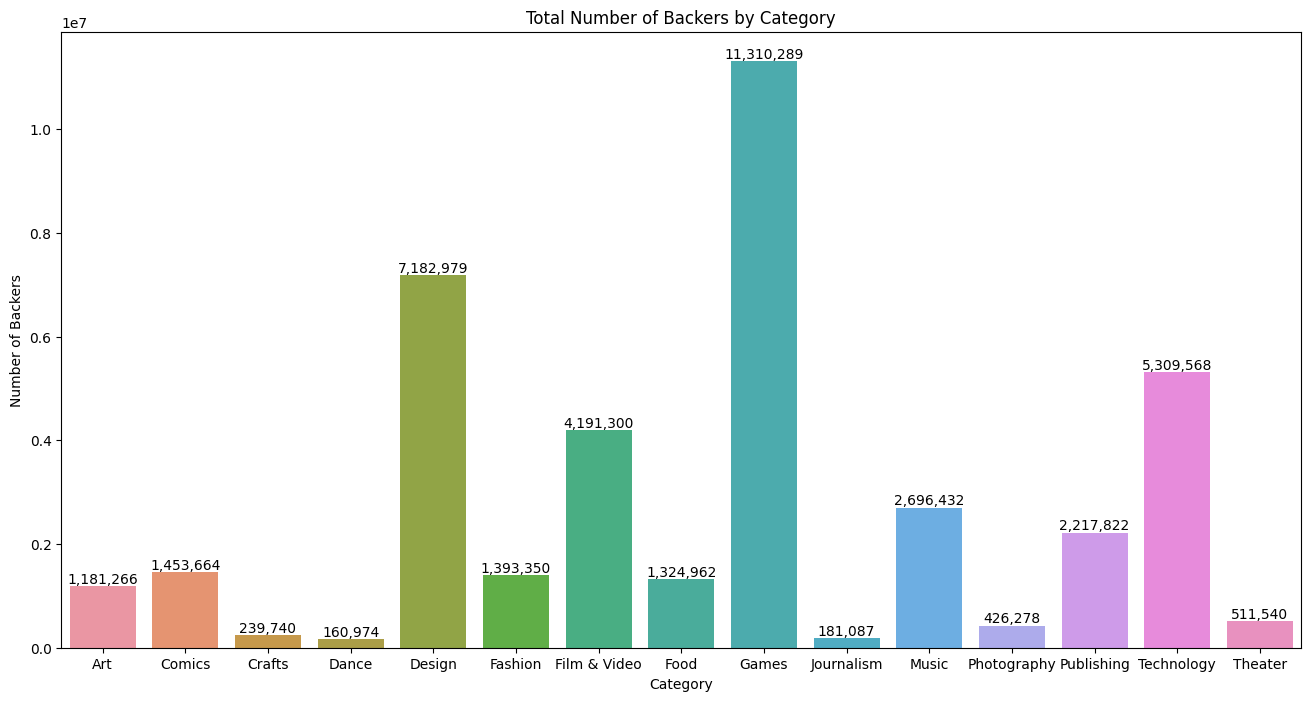

In [132]:
backers_by_category = df.groupby('Category')['Backers'].sum().reset_index()
fig = plt.figure(figsize=(16, 8))
backers_by_category = df.groupby('Category')['Backers'].sum().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Backers', data=backers_by_category)

# Set the title and axis labels
plt.title('Total Number of Backers by Category')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add total number of backers on top of each bar
for index, row in backers_by_category.iterrows():
    plt.annotate(f'{int(row["Backers"]):,}', xy=(index, row['Backers']), ha='center', va='bottom')

# Show the plot
plt.show()

### Hypothesis Test

Since we noticed that technology had a significantly large mean goal, we can perform a hypothesis test determining if the mean of the total amount of the goal is statistically significant to the overall mean.

We do this by performing the following hypothesis test where:

* The Null Hypothesis is the that the mean goal of campaigns in the technology category is not significantly different from the overall mean goal.
* The Alternative Hypothesis is the that the mean goal of campaigns is significantly different from the overall mean goal.
* We set out alpha value to 0.05


In [134]:
from scipy.stats import ttest_1samp

# Select the data for the year 2015
data_2015 = df.loc[df['Category'] == 'Technology']['Goal']

# Calculate the overall mean total pledged
overall_mean = df['Goal'].mean()

# Perform the t-test
t_statistic, p_value = ttest_1samp(data_2015, overall_mean)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Check if the result is statistically significant at alpha=0.05
if p_value < 0.05:
    print('The result is statistically significant at alpha=0.05.')
else:
    print('The result is not statistically significant at alpha=0.05.')

t-statistic: 6.434918751774902
p-value: 1.2527751679677298e-10
The result is statistically significant at alpha=0.05.




### Logistic Regression

Finally we can perform a logistic regression to create a model that can predict the success or failure of a kickstarter campaign


In [ ]:
# Create new data frame only containing results of successful vs failed campaigns
df_success=df[df["State"] == "Successful"]
df_failed=df[df["State"] == "Failed"]
df2 = pd.concat([df_success,df_failed],axis=0)

# Set Categorical Variables to 0 and 1
df2 = df2.replace('Successful', 1)
df2 = df2.replace('Failed', 0)

# Remove dates 
df2.drop(columns=["Name","Launched","Deadline",'Subcategory'],inplace=True)
df2.reset_index(inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df2[['Category', 'Country']])

# Combine dummy variables with the numerical variables

numvars = df2[['Goal', 'Pledged', 'Backers', 'Elapsed_Time']]
X = pd.concat([numvars, df_dummies], axis=1)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df2['State']


#split the data into training data sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state =0)


#Perform Loisitc Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Predict the target variable using the testing set
y_pred = lr.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89    177592
           1       0.90      0.72      0.80    120526

    accuracy                           0.86    298118
   macro avg       0.87      0.83      0.84    298118
weighted avg       0.86      0.86      0.85    298118



We can see from our classification report that the overall accuracy for our model is 0.86, telling us that this regression model is fairly accurate. 

Since we have the regression model, we can use it to predict the success or failure of campaigns in 2018. So first we have to create a dataset containing the data we ommitted from the previous analysis:


In [ ]:
# Filter out all data that doesn't have a deadline in 2018
df2018 = startData[startData['Deadline'].dt.year == 2018]
df2018 = df2018.reset_index(drop=True)


,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Elapsed_Time
0,THICKER,Publishing,Fiction,United States,2017-11-01 23:54:01,2018-01-01,150,0,0,Failed,60
1,Rapid Revolution,Games,Tabletop Games,United States,2017-11-02 00:02:19,2018-01-01,15000,3012,9,Canceled,59
2,My Student Lounge,Technology,Apps,United States,2017-11-02 00:25:49,2018-01-01,10000,20,3,Failed,59
3,Gaia's Gairdin,Food,Vegan,United States,2017-11-02 01:28:09,2018-01-01,5000,51,3,Failed,59
4,Mama's Sofrito 100% fresh 100% vegan,Food,Vegan,United States,2017-11-02 02:30:18,2018-01-01,80000,210,6,Failed,59


Next we use the logistic regression in order to predict the results of the state. 


In [ ]:
# Create new data frame only containing results of successful vs failed campaigns
df_success=df2018[df2018["State"] == "Successful"]
df_failed=df2018[df2018["State"] == "Failed"]
df3 = pd.concat([df_success,df_failed],axis=0)

# Set Categorical Varaibles to 0 and 1
df3 = df2.replace('Successful', 1)
df3 = df2.replace('Failed', 0)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df3[['Category', 'Country']])

# Combine dummy variables with the numerical variables

numvars = df3[['Goal', 'Pledged', 'Backers', 'Elapsed_Time']]
X = pd.concat([numvars, df_dummies], axis=1)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df3['predictedState'] = lr.predict(X_scaled)

Now that we've determined out predicted values, we can now use a classification report to compare our data as seen below:


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
confu_matrix = confusion_matrix(df3['State'], df3['predictedState'])

# Print classification report
print(classification_report(df3['State'], df3['predictedState']))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89    197477
           1       0.90      0.72      0.80    133765

    accuracy                           0.86    331242
   macro avg       0.87      0.83      0.84    331242
weighted avg       0.86      0.86      0.85    331242





### Correlation Matrix

We can additionally, find the correlation matrix for our variables in our data in order to find any patterns. We only use the numerical variables for this graph as there are just too many categorical variables for both the category and country variables.


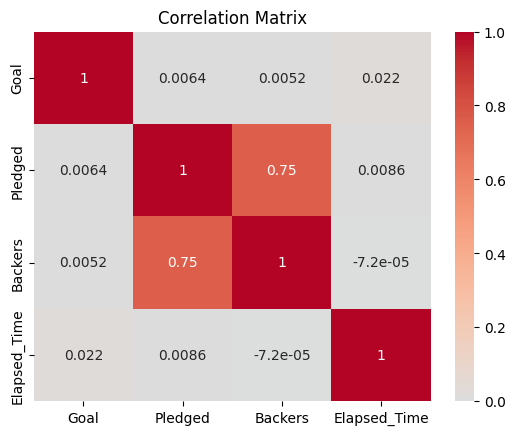

In [ ]:
# calculate correlation matrix
corr_matrix = numvars.corr(method='pearson')

# plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix')
plt.show()


The matrix above tells us that the two variables: ```Backers``` and ```Pledged``` have very high correlation with one another which makes sense, as the number of backers would logically mean more money is being pledged to the campaign. The other combination of variables, however, do not seem to have much correlation with each other as there numbers are too close to 0. 

# Discussion

Overall we see that while fashion and games maintain the highest number of campaigns and funding, the success rates of such campaigns are shown to be on the lower end. Technology, however, seems to be both have a high amount of backers and funding, as well as a high success rate. Conversely, while journalism does not have a high amount of backers, it still trends high even sometimes trending higher than technology in certain years. 

As seen by the graphs, a majority of them indicate a sharp peak or decline pivoted on the year 2015. By doing some research, we see some notable kickstarter campaigns to come out during this era:

    * Travel Jacket By BAUBAX - sportswear that raised $9,192,055 
    * Exploding Kittens - popular card game that raised $8,782,571 and was the fastest growing kickstarter to that date
    * Pebble Time – updated version of Pebble’s smartwatch that raised $20,338,986 and is the most successful Kickstarter product ever


Sources: [Screenrant](https://screenrant.com/most-successful-kickstarter-campaign-total-funding-amount/), [Guardian](https://www.theguardian.com/technology/2015/feb/23/exploding-kittens-card-game-kickstarter)
    

Limitations of this analysis is that the data cuts off around January of 2018. This means the data is analyzing data that is 5 years old and may not accurately reflect the state of Kickstarter in the current day. Many things have happened during the time period after the dataset displays, most notably the 2020 Coronavirus pandemic that has undoubtly changed the way we view and dictate business on the internet. 

# Conclusion

To recap, this analysis was a deep dive into kickstarter campaigns and an analysis of what factors are important for a successful campaign. I created graphs and matrixes that show the correlation between several factors of the campaign such as category, time created, amount of backers, and amount of money needed. In addition, we performed a hypothesis test to determine whether or not 2015, a year that showed great shanged in many trends in the line and bar graphs, was statistically different from the other means overall. 


# References

[Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects)

[Kickstarter.com, 2023](https://www.kickstarter.com/help/stats)

[Jensen, 2018](https://www.cambridge.org/core/journals/design-science/article/identifying-challenges-in-crowdfunded-product-development-a-review-of-kickstarter-projects/F2659234936B8349EAF5AFCFBA2199E8)

[Crowdfunding by Goran Calic](https://sk.sagepub.com/reference/the-sage-encyclopedia-of-the-internet-3v/i1840.xml)

[Guardian](https://www.theguardian.com/technology/2015/feb/23/exploding-kittens-card-game-kickstarter)
